# 1. Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dataset.shape

(1025, 14)

# 2. Checking Missing Values

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Checking the duplicated rows
dataset.duplicated().sum()

np.int64(723)

In [8]:
dataset = dataset.drop_duplicates(keep = "first")

In [9]:
dataset.shape

(302, 14)

# 3. Statistical Summary and Visualizing Outliers

In [10]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# 3.Exploartory Data Analysis (EDA)

In [12]:
dataset['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

<Axes: xlabel='sex'>

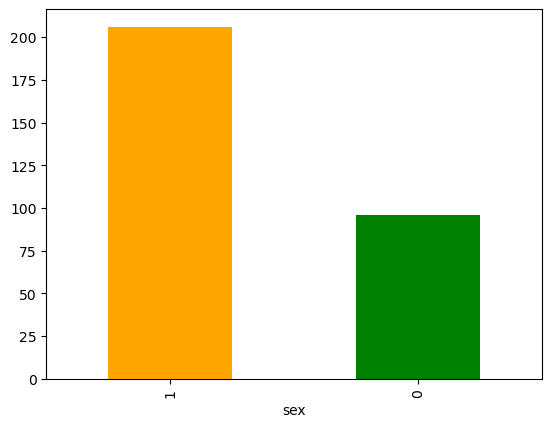

In [13]:
dataset['sex'].value_counts().plot(kind='bar', color=['orange', 'green'])

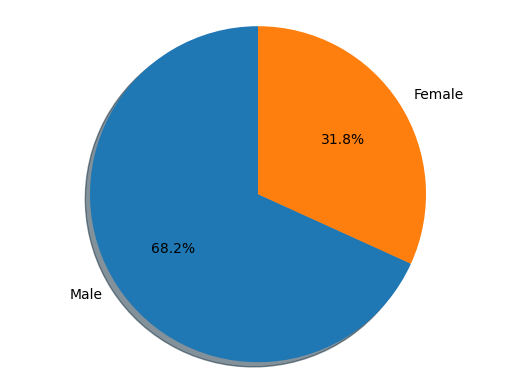

In [14]:
#visualizing in Pie chart
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(dataset.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [15]:
dataset['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

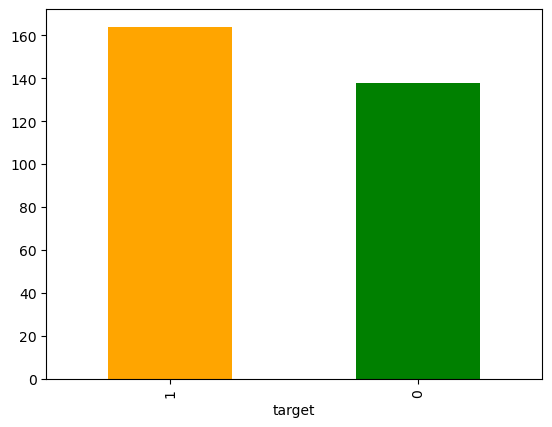

In [16]:
dataset['target'].value_counts().plot(kind='bar', color=['orange', 'green'])

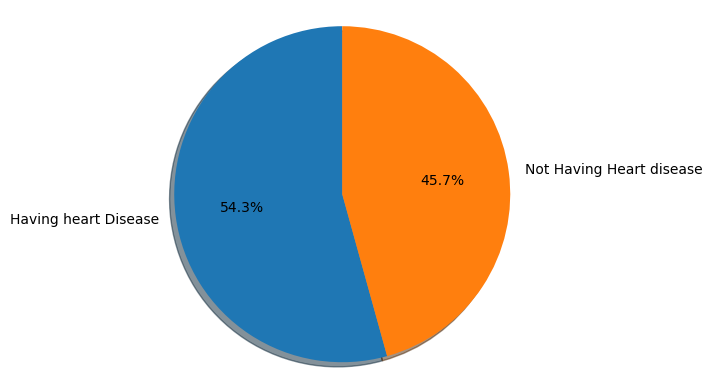

In [17]:
#visualizing in Pie chart
labels = 'Having heart Disease', 'Not Having Heart disease'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(dataset.target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [18]:
pd.crosstab(dataset.target, dataset.sex)

sex,0,1
target,,
0,24,114
1,72,92


C:\Users\nandh\AppData\Local\Temp\ipykernel_18636\3381137354.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)


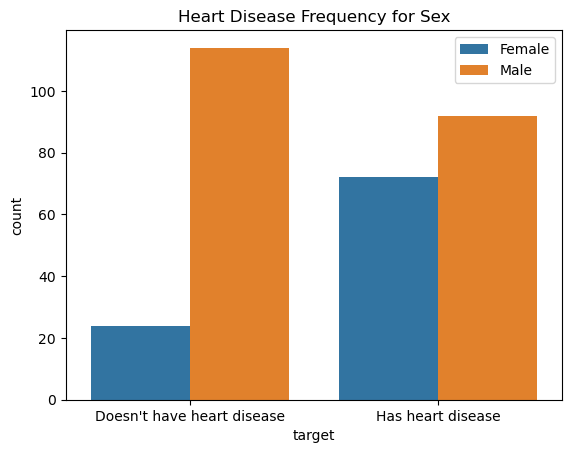

In [19]:
fig = sns.countplot(x = 'target', data = dataset, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

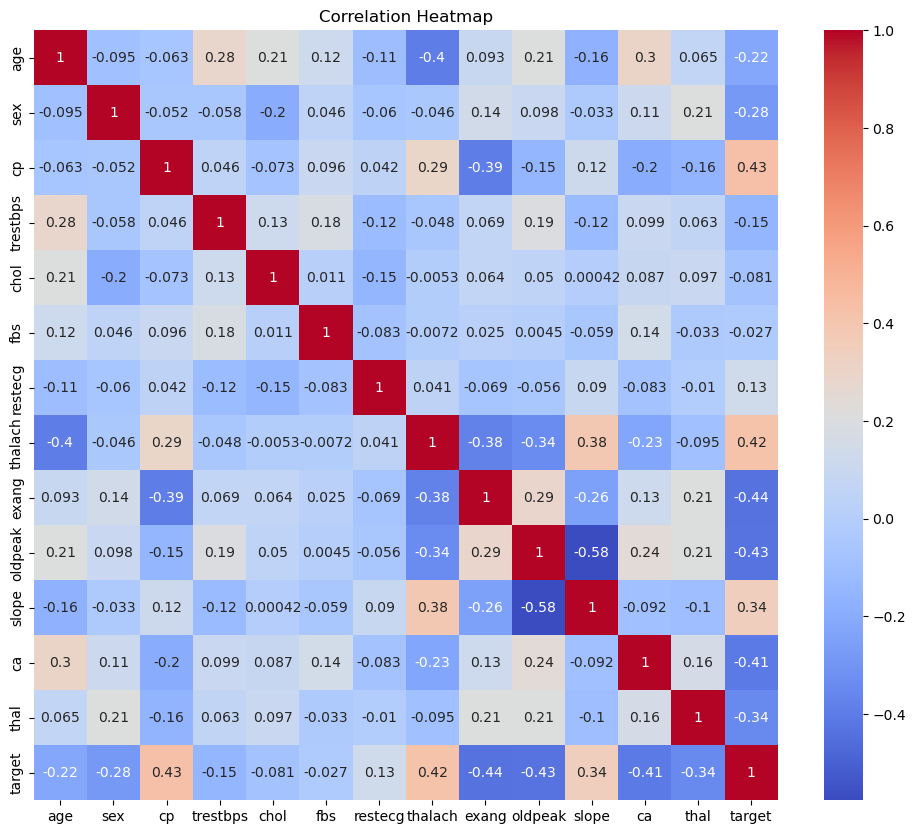

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4. Checking Outliers using boxplot

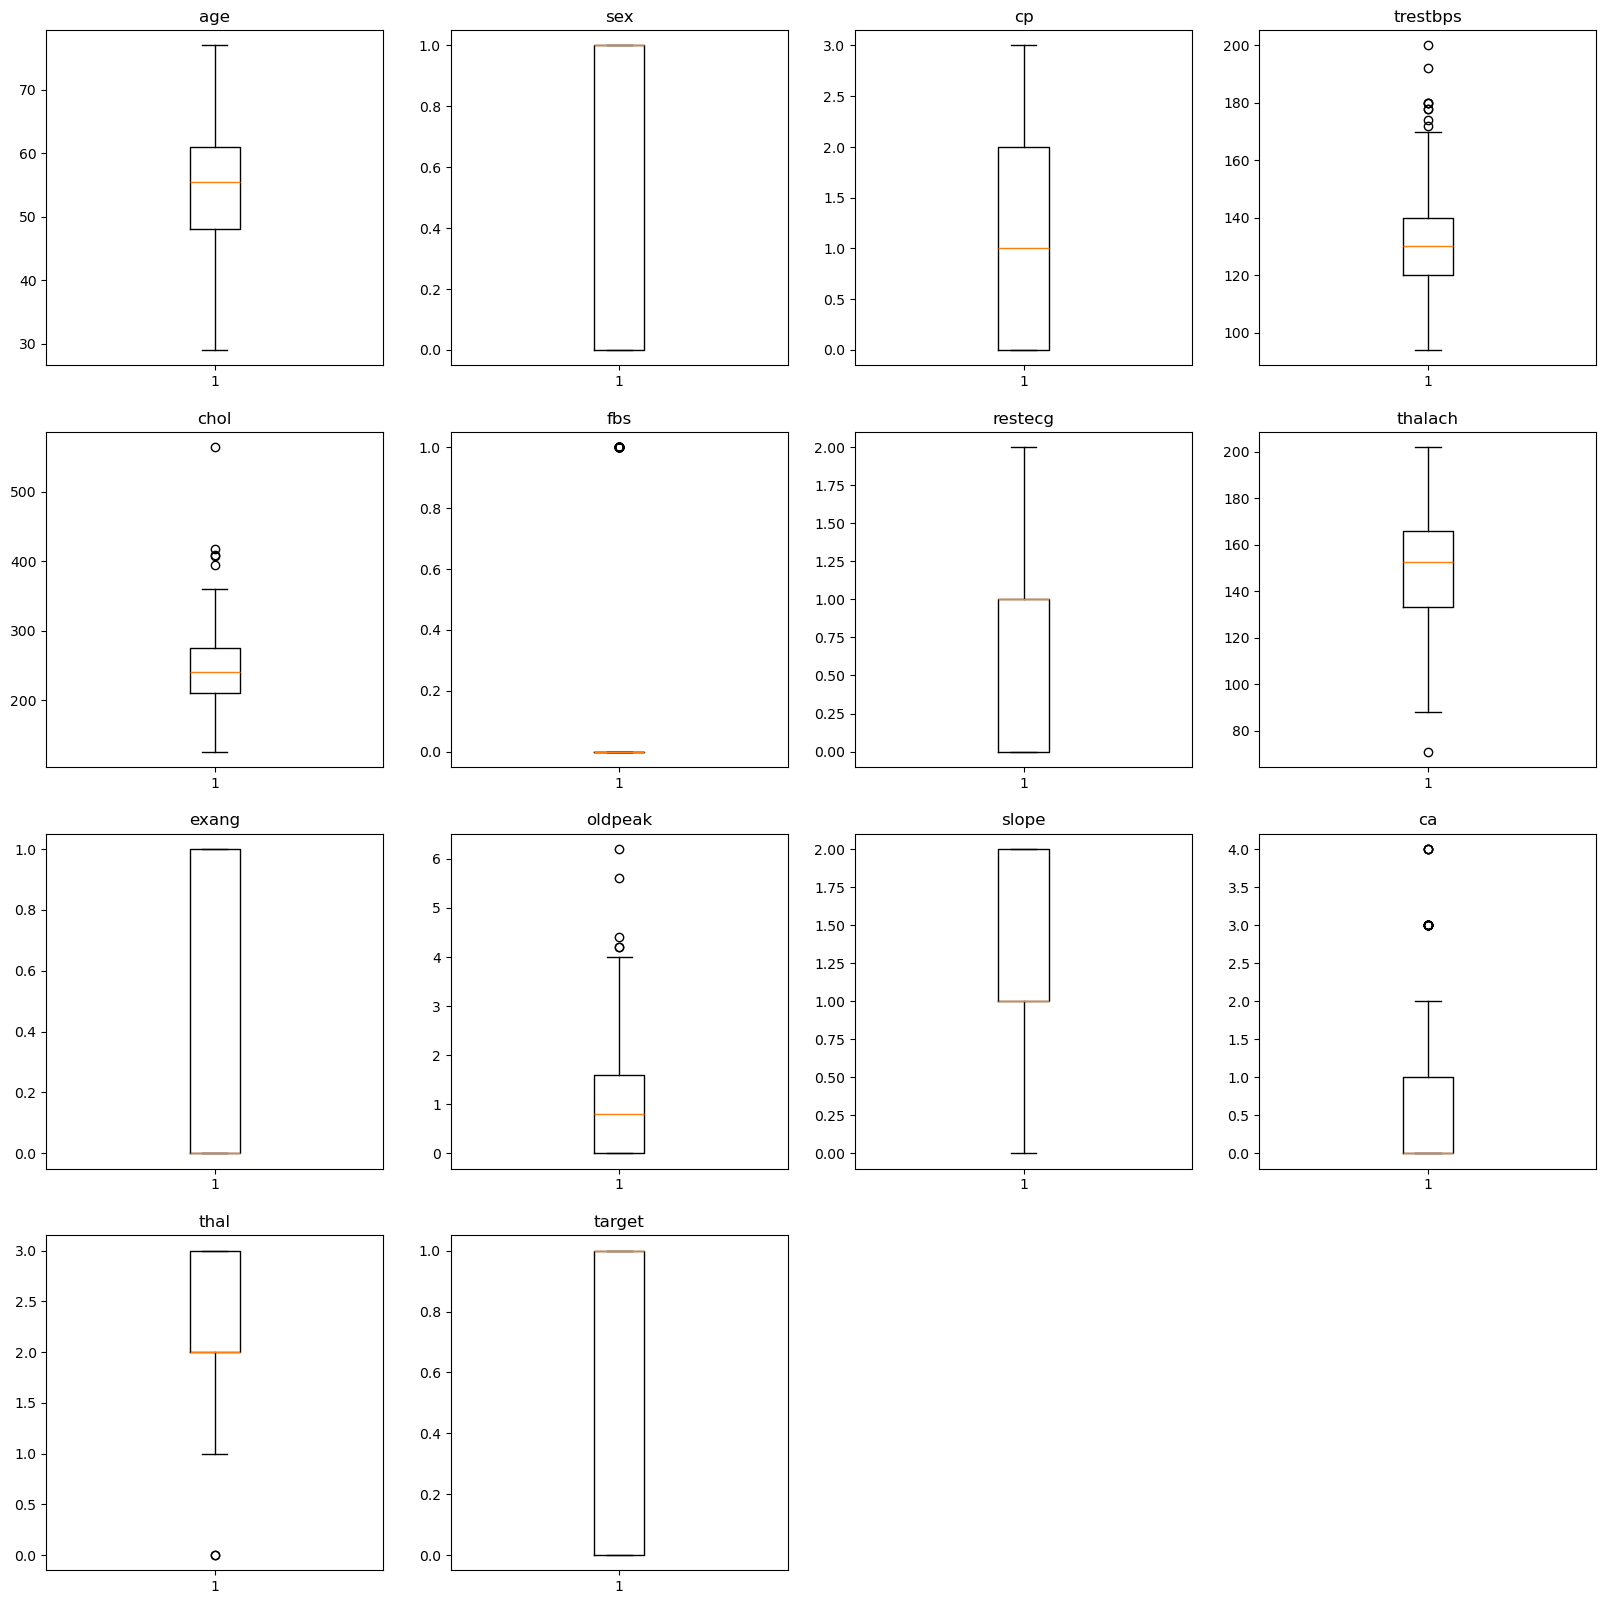

In [21]:
x = 1
plt.figure(figsize = (20,20))

for i in dataset.columns:
    plt.subplot(4,4,x)
    plt.boxplot(dataset[i])
    plt.title(i)
    x = x+1


# 4. Splitting the Train and test data

In [22]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
X = dataset.drop('target', axis=1)
y = dataset['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

# 5. Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42,min_samples_split=30)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=30, random_state=42)

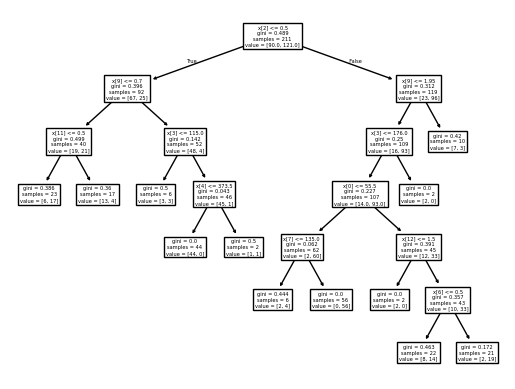

In [55]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [56]:
y_predict = clf.predict(X_test)
y_predict

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0])

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
CM = confusion_matrix(y_test,y_predict)
Accuracy = accuracy_score(y_test,y_predict)
Clf_report = classification_report(y_test,y_predict)
print('confusion_matrix:',CM)
print('Accuracy:',Accuracy)
print('Clf_report:',Clf_report)


confusion_matrix: [[38 10]
 [10 33]]
Accuracy: 0.7802197802197802
Clf_report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79        48
           1       0.77      0.77      0.77        43

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



# 6. Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_predict = forest.predict(X_test)
y_predict

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0])

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
CM = confusion_matrix(y_test,y_predict)
Accuracy = accuracy_score(y_test,y_predict)
clf_report = classification_report(y_test,y_predict)
print('confusion_matrix:',CM)
print('Accuracy:',Accuracy)
print('Clf_report:',Clf_report)


confusion_matrix: [[36 12]
 [ 3 40]]
Accuracy: 0.8351648351648352
Clf_report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79        48
           1       0.77      0.77      0.77        43

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



# 7.Feature Importance (Random forest)

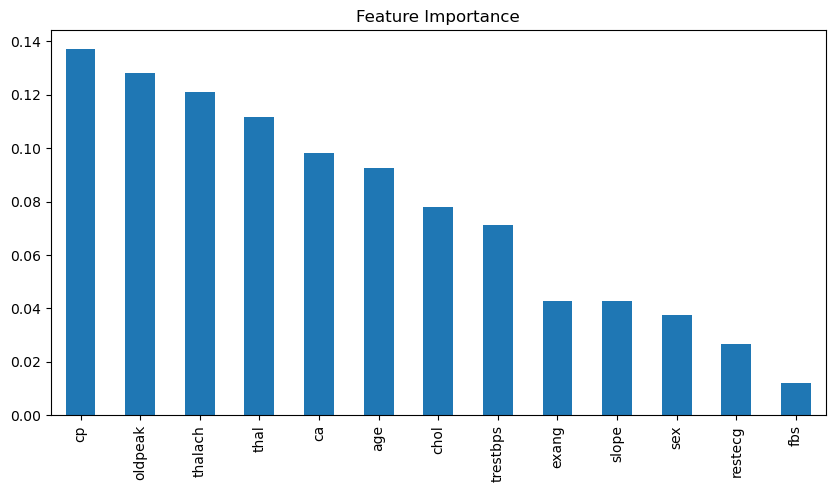

In [61]:
importances = pd.Series(forest.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


# 8. Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score
dt_cv = cross_val_score(clf, X, y, cv=5)
rf_cv = cross_val_score(forest, X, y, cv=5)

print("Decision Tree CV Accuracy:", dt_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())


Decision Tree CV Accuracy: 0.7812568306010929
Random Forest CV Accuracy: 0.8243715846994535
